In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , FunctionTransformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score
import numpy as np
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [33]:
#df_desc = pd.read_csv("data/key.csv", index_col = 0)
df = pd.read_csv("data/data_clean.csv")
df = df.drop("Unnamed: 0",axis=1)

In [34]:
df.dtypes

funder                   object
gps_height                int64
installer                object
wpt_name                 object
basin                    object
region_code               int64
district_code             int64
population                int64
public_meeting           object
permit                   object
construction_year         int64
extraction_type_class    object
management               object
payment_type             object
quality_group            object
quantity                 object
source                   object
source_class             object
waterpoint_type          object
status_group             object
dtype: object

In [35]:
df.describe()

,gps_height,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,668.297239,15.297003,5.629747,179.909983,1300.652475
std,693.116350,17.587406,9.633649,471.482176,951.620547
min,-90.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,2.000000,0.000000,0.000000
50%,369.000000,12.000000,3.000000,25.000000,1986.000000
75%,1319.250000,17.000000,5.000000,215.000000,2004.000000
max,2770.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
def int_to_object(df):
    df["region_code"] = df["region_code"].astype(object)
    df["district_code"] = df["district_code"].astype(object)
    df["public_meeting"] = df["public_meeting"].astype(str)
    df["permit"] = df["permit"].astype(str)
    df["construction_year_bins"] = df["construction_year_bins"].astype(str)
    return df.dtypes

In [29]:
df.describe()

,gps_height,population,construction_year
count,59400.000000,59400.000000,59400.000000
mean,668.297239,179.909983,1300.652475
std,693.116350,471.482176,951.620547
min,-90.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,369.000000,25.000000,1986.000000
75%,1319.250000,215.000000,2004.000000
max,2770.000000,30500.000000,2013.000000


In [12]:
#int_to_object(df)

In [13]:
X = df.drop(["status_group"], axis=1)
y = df['status_group']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=465615615)

In [15]:
X_train.dtypes

funder                   object
gps_height                int64
installer                object
wpt_name                 object
basin                    object
region_code              object
district_code            object
population                int64
public_meeting           object
permit                   object
construction_year         int64
extraction_type_class    object
management               object
payment_type             object
quality_group            object
quantity                 object
source                   object
source_class             object
waterpoint_type          object
dtype: object

In [16]:
X_train["waterpoint_type"].value_counts()

communal standpipe             21389
hand pump                      13085
other                           4822
communal standpipe multiple     4585
improved spring                  575
cattle trough                     90
dam                                4
Name: waterpoint_type, dtype: int64

In [17]:
X_train["wpt_name"].value_counts()

none                         2675
Shuleni                      1319
Zahanati                      617
Msikitini                     390
Kanisani                      233
                             ... 
Mihalle                         1
Kwa Marko Mdenye                1
Shule Ya Msingi_Makorongo       1
Katoro Primary                  1
Lukonja                         1
Name: wpt_name, Length: 28978, dtype: int64

In [18]:
def grab_numeric(df):
    return df.select_dtypes(include=['int64'])

In [19]:
GrabNumeric = FunctionTransformer(grab_numeric)

In [20]:
GrabNumeric

FunctionTransformer(func=<function grab_numeric at 0x0000015F5CA3B790>)

In [21]:
pipe= Pipeline(steps=[("num", GrabNumeric),
                      ( "ss", StandardScaler())])

In [22]:
pipe.fit(X_train)


Pipeline(steps=[('num',
                 FunctionTransformer(func=<function grab_numeric at 0x0000015F5CA3B790>)),
                ('ss', StandardScaler())])

In [23]:
pipe.transform(X_train)

array([[-0.84040878,  0.25062257,  0.73816517],
       [-0.96708423, -0.38007373, -1.36866403],
       [ 0.55590018,  0.29266899,  0.72765205],
       ...,
       [-0.96708423, -0.38007373, -1.36866403],
       [ 0.77614273, -0.37797141,  0.74657567],
       [-0.96708423, -0.38007373, -1.36866403]])

In [24]:
j = -1
for i in X_train.columns:
    j+=1
    print("Index Number", j,i)

Index Number 0 funder
Index Number 1 gps_height
Index Number 2 installer
Index Number 3 wpt_name
Index Number 4 basin
Index Number 5 region_code
Index Number 6 district_code
Index Number 7 population
Index Number 8 public_meeting
Index Number 9 permit
Index Number 10 construction_year
Index Number 11 extraction_type_class
Index Number 12 management
Index Number 13 payment_type
Index Number 14 quality_group
Index Number 15 quantity
Index Number 16 source
Index Number 17 source_class
Index Number 18 waterpoint_type


In [25]:
# We'll throw these mini-pipelines into our ColumnTransformer.

subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer(strategy="median")),
                           ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='constant')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [26]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, [1,7]),
                                         ('subpipe_cat', subpipe_cat, [0,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18])])

In [27]:
logreg_model_pipe = Pipeline(steps=([("ct", CT), 
                                    ("logreg", LogisticRegression(random_state=465654))]))

In [23]:
logreg_model_pipe.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [24]:
logreg_model_pipe.score(X_train, y_train)

0.7410325476992143

In [ ]:
scorer = recall_score(average = 'weighted')

In [25]:
rfc = RandomForestClassifier(random_state=165156156, n_jobs=-1)
rfc_model_pipe = Pipeline([("ct", CT), ("rfc", rfc)])

In [26]:
rfc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [27]:
rfc_model_pipe.score(X_train, y_train)

0.9449382716049383

In [37]:
rfc_model_pipe.score(X_test, y_test)

0.7824242424242425

In [28]:
rfc_2 = RandomForestClassifier(random_state=42, max_depth=11, n_jobs=-1)
rfc_2_pipe= Pipeline([("ct", CT), ('rfc_2', rfc_2)])

In [29]:
rfc_2_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [30]:
rfc_2_pipe.score(X_train, y_train)

0.7611896745230079

In [38]:
rfc_2_pipe.score(X_test, y_test)

0.750976430976431

In [31]:
y_hat = rfc_2_pipe.predict(X_test)

In [32]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")


Our final model's accuracy on the test set is 0.75. 

Our final model's recall on the test set is 0.53 

Our final model's precision on the test set is 0.76 

Our final model's f1-score on the test is 0.54.



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


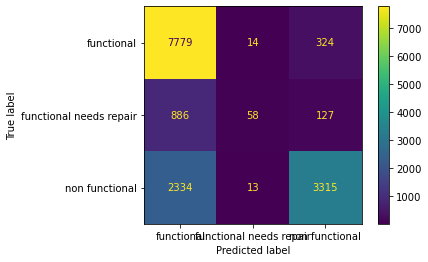

In [33]:
plot_confusion_matrix(rfc_2_pipe, X_test, y_test);

In [34]:
#gbc_model_pipe = Pipeline([('ct', CT), ('gbc', GradientBoostingClassifier(random_state=42))])

In [41]:
rfc_3 = RandomForestClassifier(random_state=42, max_depth=15, n_jobs=-1)
rfc_3_pipe= Pipeline([("ct", CT), ('rfc_3', rfc_3)])
rfc_3_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [42]:
rfc_3_pipe.score(X_train, y_train)

0.813939393939394

Trying a Random Forest Grid Search on just a few variables to make sure it works. I tried changing scoring to recall and the results were pretty similar. 

In [59]:

# Grid of parameters to choose from
parameters = {"rfc_3__n_estimators": [150, 250],
    "rfc_3__min_samples_leaf": np.arange(5, 7),
    "rfc_3__max_samples": np.arange(0.3, 0.7, 0.2),
             }

# Run the grid search
grid_obj = GridSearchCV(rfc_3_pipe, parameters, scoring="accuracy",cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc_3_pipe = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rfc_3_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [54]:
rfc_4 = RandomForestClassifier(random_state=42, max_depth=15, max_samples=0.5,  min_samples_leaf=5, n_estimators=250, n_jobs=-1)
rfc_4_pipe= Pipeline([("ct", CT), ('rfc_4', rfc_4)])
rfc_4_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [55]:
rfc_4_pipe.score(X_train, y_train)

0.7751515151515151

In [56]:
y_hat = rfc_4_pipe.predict(X_test)

In [58]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")


Our final model's accuracy on the test set is 0.76. 

Our final model's recall on the test set is 0.56 

Our final model's precision on the test set is 0.75 

Our final model's f1-score on the test is 0.57.



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


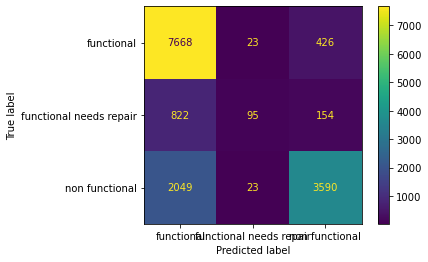

In [57]:
plot_confusion_matrix(rfc_4_pipe, X_test, y_test);

In [60]:
rfc_5 = RandomForestClassifier(random_state=91839048, n_jobs=-1)
rfc_5_pipe= Pipeline([("ct", CT), ('rfc_5', rfc_5)])
rfc_5_pipe.fit(X_train, y_train)

rfc_5_pipe.score(X_train, y_train)

0.9449158249158249

Trying a much larger range of parameters in the Random Forest Grid Search. For some reason it had problems with min_samples_leaf of 14-20.

The parameters I chose were max_depth which gives the number of decision points; n_estimators which is the number of trees used in each forest; min_samples_leaf which says finely tuned we can cut the data; and max_samples which allows us to devote a smaller percent of the data to each random forest. 

In [68]:

# Grid of parameters to choose from
parameters = {"rfc_5__max_depth": [3, 5, 10, 13, 16, 18, 22],
    "rfc_5__n_estimators": [150, 250, 400, 700, 1000],
    "rfc_5__min_samples_leaf": np.arange(5, 8, 10),
    "rfc_5__max_samples": np.arange(0.1, 0.9, 0.2),
             }

# Run the grid search
grid_obj = GridSearchCV(rfc_5_pipe, parameters, scoring="accuracy",cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc_5_pipe = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rfc_5_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [70]:
rfc_6 = RandomForestClassifier(random_state=42, max_depth=22, max_samples=0.7,  min_samples_leaf=5, n_estimators=250, n_jobs=-1)
rfc_6_pipe= Pipeline([("ct", CT), ('rfc_6', rfc_6)])
rfc_6_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [73]:
grid_obj.cv_results_['mean_test_score']


array([0.688844  , 0.68897868, 0.69158249, 0.69164983, 0.69382716,
       0.69028058, 0.69140292, 0.69328844, 0.69328844, 0.69414141,
       0.6901908 , 0.6908642 , 0.69351291, 0.69369248, 0.69429854,
       0.68998878, 0.69104377, 0.69351291, 0.69344557, 0.69420875,
       0.71156004, 0.71198653, 0.71209877, 0.71212121, 0.71194164,
       0.71310887, 0.71436588, 0.71317621, 0.71313131, 0.71272727,
       0.71223345, 0.71349046, 0.71344557, 0.71335578, 0.71335578,
       0.71261504, 0.71331089, 0.71358025, 0.71375982, 0.71331089,
       0.73418631, 0.73434343, 0.7349046 , 0.73521886, 0.73537598,
       0.73950617, 0.74006734, 0.73979798, 0.73991021, 0.73977553,
       0.74078563, 0.74053872, 0.74103255, 0.74109989, 0.74116723,
       0.74159371, 0.74078563, 0.74139169, 0.74125701, 0.74154882,
       0.74188552, 0.74143659, 0.7420202 , 0.74190797, 0.74179574,
       0.74956229, 0.74989899, 0.75043771, 0.75034792, 0.75032548,
       0.75369248, 0.75344557, 0.75346801, 0.75353535, 0.75391


Our final model's accuracy on the test set is 0.78. 

Our final model's recall on the test set is 0.58 

Our final model's precision on the test set is 0.76 

Our final model's f1-score on the test is 0.61.



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


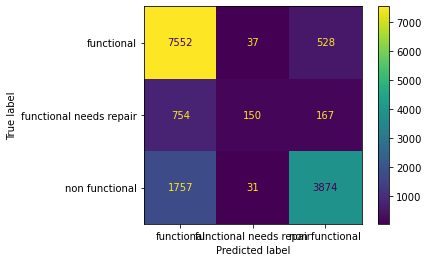

In [94]:
rfc_6_pipe.score(X_train, y_train)
y_hat = rfc_6_pipe.predict(X_test)
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")
plot_confusion_matrix(rfc_6_pipe, X_test, y_test); 

Running another grid search of random forest. The one parameter that didn't seem to be fully optimal is the max depth so I am trying some higher levels of max depth. Optimal trees were 250 so I am trying more around that area. Min samples per leaf was 5 so I am seeing 

In [74]:
rfc_7 = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc_7_pipe= Pipeline([("ct", CT), ('rfc_7', rfc_7)])
rfc_7_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [ ]:
# Grid of parameters to choose from
parameters = {"rfc_7__max_depth": [20, 22, 25, 32],
    "rfc_7__n_estimators": [200, 250, 300],
    "rfc_7__min_samples_leaf": np.arange(3, 5, 7),
    "rfc_7__max_samples": np.arange(0.6, 0.8, 0.1),
             }

# Run the grid search
grid_obj = GridSearchCV(rfc_7_pipe, parameters, scoring="recall",cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc_7_pipe = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rfc_7_pipe.fit(X_train, y_train)
#error message below

In [93]:
# Grid of parameters to choose from
parameters = {"rfc_7__max_depth": [20, 22, 25, 32],
    "rfc_7__n_estimators": [200, 250, 300],
    "rfc_7__min_samples_leaf": [3, 5, 7],
    "rfc_7__max_samples": [0.6, 0.7, 0.8],
             }


# Run the grid search
grid_obj = GridSearchCV(rfc_7_pipe, parameters, scoring= scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc_7_pipe = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rfc_7_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [95]:
rfc_7 = RandomForestClassifier(random_state=42, max_depth=32, max_samples=0.8,  min_samples_leaf=3, n_estimators=300, n_jobs=-1)
rfc_7_pipe= Pipeline([("ct", CT), ('rfc_7', rfc_7)])
rfc_7_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               


Our final model's accuracy on the test set is 0.79. 

Our final model's recall on the test set is 0.61 

Our final model's precision on the test set is 0.76 

Our final model's f1-score on the test is 0.64.



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


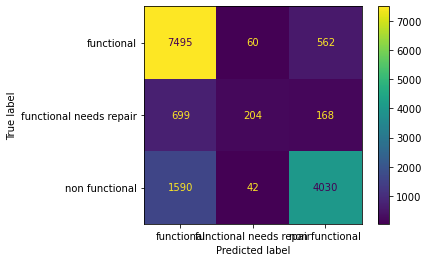

In [96]:
rfc_7_pipe.score(X_train, y_train)
y_hat = rfc_7_pipe.predict(X_test)
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")
plot_confusion_matrix(rfc_7_pipe, X_test, y_test); 

In [98]:
#Do I need to change the number at the end? Right now I am running the same thing over and over again?
#Where do I need to change the number to show it is a different model?
rfc_7 = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc_7_pipe= Pipeline([("ct", CT), ('rfc_7', rfc_7)])
rfc_7_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [101]:
# Grid of parameters to choose from
#Testing Gini vs entropy to see if my model will run
parameters = {"rfc_7__max_depth": [32],
    "rfc_7__n_estimators": [300],
    "rfc_7__min_samples_leaf": [3],
    "rfc_7__max_samples": [0.8],
    "rfc_7__criterion": ["gini", "entropy"],
             }


# Run the grid search
grid_obj = GridSearchCV(rfc_7_pipe, parameters, scoring= scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc_7_pipe = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rfc_7_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [104]:
rfc_7 = RandomForestClassifier(random_state=42, max_depth=32, max_samples=0.8,  min_samples_leaf=3, n_estimators=300, criterion = "gini", n_jobs=-1)
rfc_7_pipe= Pipeline([("ct", CT), ('rfc_7', rfc_7)])
rfc_7_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               


Our final model's accuracy on the test set is 0.79. 

Our final model's recall on the test set is 0.61 

Our final model's precision on the test set is 0.76 

Our final model's f1-score on the test is 0.64.



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


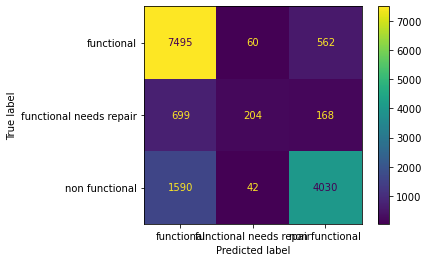

In [105]:
rfc_7_pipe.score(X_train, y_train)
y_hat = rfc_7_pipe.predict(X_test)
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")
plot_confusion_matrix(rfc_7_pipe, X_test, y_test); 


Our final model's accuracy on the test set is 0.79. 

Our final model's recall on the test set is 0.61 

Our final model's precision on the test set is 0.76 

Our final model's f1-score on the test is 0.64.



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


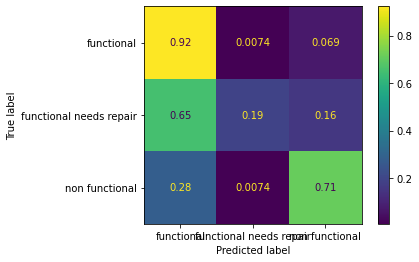

In [109]:
rfc_7_pipe.score(X_train, y_train)
y_hat = rfc_7_pipe.predict(X_test)
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")
plot_confusion_matrix(rfc_7_pipe, X_test, y_test, normalize = "true"); 

Prior model with everything same except using gini- are they the same?
Our final model's accuracy on the test set is 0.79. 

Our final model's recall on the test set is 0.61 

Our final model's precision on the test set is 0.76 

Our final model's f1-score on the test is 0.64.

In [106]:
rfc_7_pipe.score(X_train, y_train)

0.8238608305274971

In [107]:
rfc_8 = RandomForestClassifier(random_state=42, n_jobs=-1)
rfc_8_pipe= Pipeline([("ct", CT), ('rfc_8', rfc_8)])
rfc_8_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

Trying a new set of parameters and including criterion, higher max depth, and lower minimum leaf.

In [108]:
# Grid of parameters to choose from
#New set 
parameters = {"rfc_8__max_depth": [28, 32, 35, 42],
    "rfc_8__n_estimators": [250, 300, 350],
    "rfc_8__min_samples_leaf": [2, 3, 4],
    "rfc_8__max_samples": [0.7, 0.8, 0.9],
    "rfc_8__criterion": ["gini", "entropy"],
             }


# Run the grid search
grid_obj = GridSearchCV(rfc_8_pipe, parameters, scoring= scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc_8_pipe = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rfc_8_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [110]:
rfc_8 = RandomForestClassifier(random_state=42, max_depth=32, max_samples=0.9,  min_samples_leaf=2, n_estimators=300, n_jobs=-1)
rfc_8_pipe= Pipeline([("ct", CT), ('rfc_8', rfc_8)])
rfc_8_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               


Our final model's accuracy on the test set is 0.79. 

Our final model's recall on the test set is 0.62 

Our final model's precision on the test set is 0.74 

Our final model's f1-score on the test is 0.65.



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


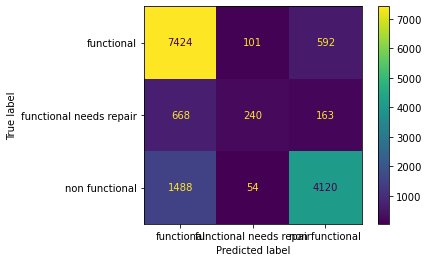

In [111]:
rfc_8_pipe.score(X_train, y_train)
y_hat = rfc_8_pipe.predict(X_test)
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat,average= 'macro'), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat,average= 'macro'), 2)}.
""")
plot_confusion_matrix(rfc_8_pipe, X_test, y_test); 

Running the one below to see if training scorer is overweighted. This is only the accuracy score. Is there a way to get
all 4 of the relevant scores?

In [113]:
rfc_8_pipe.score(X_train, y_train)

0.8491133557800224

3) SMOTE Logistic Regression: best accuracy- 0.74, best recall- 0.74
2) Random Forest: best accuracy: 0.79, best recall 0.62
1) Dummy Classifier: best accuracy- 0.54, best recall-0.54
4) Decision Tree: best accuracy: 0.75, best recall 0.75
5) HistGradientBoostingClassifier - 78.9 recall accuracy
6) CatBoostClassifier-79 recall and accuracy


[54, 62, 74, 75, 79, 79]

Text(0, 0.5, 'Prediction Percentage')

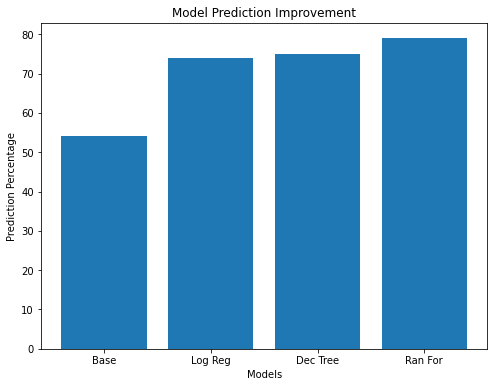

In [42]:
#X values


Percent_Accuracy = [54, 74, 75, 79]
#X labels
x = ["Base", "Log Reg", "Dec Tree", "Ran For"]
#no idea what it does
#labels = "Genres"

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.bar(x, Percent_Accuracy)

# Give a title to the bar graph and label the axes
ax.set_title("Model Prediction Improvement")

# Set labels for X and Y axes
ax.set_xlabel("Models")
ax.set_ylabel("Prediction Percentage")

Text(0, 0.5, 'Accuracy Percentage')

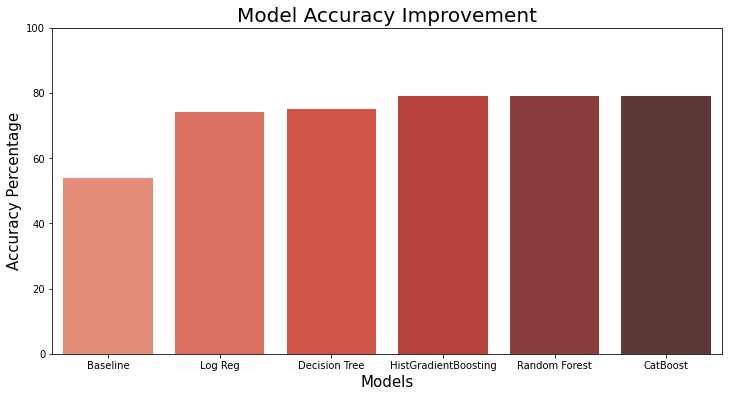

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
Percent_Accuracy = [54, 74, 75, 79, 79, 79]
Models = ["Baseline", "Log Reg", "Decision Tree", "HistGradientBoosting", "Random Forest", "CatBoost"]
ax = sns.barplot(x= Models, y= Percent_Accuracy, palette='Reds_d')
#plt.ylim(30)
ax.set_ylim(0, 100)
ax.set_title("Model Accuracy Improvement", fontsize = 20)
ax.set_xlabel("Models", fontsize = 15)
ax.set_ylabel("Accuracy Percentage", fontsize = 15)


Text(0, 0.5, 'Recall Percentage')

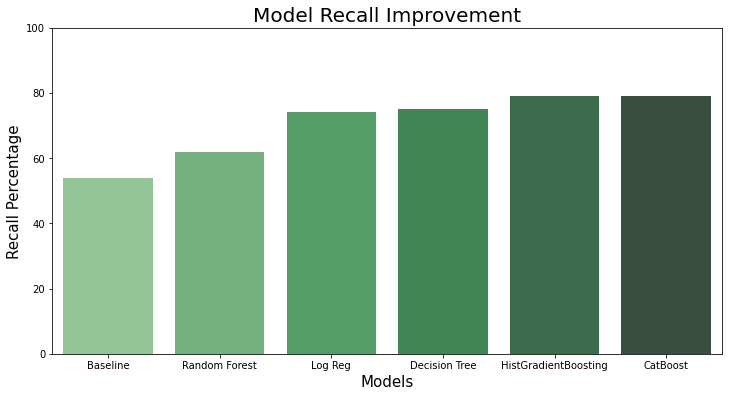

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))
Percent_Accuracy = [54, 62, 74, 75, 79, 79]
Models = ["Baseline", "Random Forest", "Log Reg", "Decision Tree", "HistGradientBoosting", "CatBoost"]
ax = sns.barplot(x= Models, y= Percent_Accuracy, palette='Greens_d')
#plt.ylim(30)
ax.set_ylim(0, 100)
ax.set_title("Model Recall Improvement", fontsize = 20)
ax.set_xlabel("Models", fontsize = 15)
ax.set_ylabel("Recall Percentage", fontsize = 15)


In [ ]:
3) SMOTE Logistic Regression: best accuracy- 0.74, best recall- 0.74
2) Random Forest: best accuracy: 0.79, best recall 0.62
1) Dummy Classifier: best accuracy- 0.54, best recall-0.54
4) Decision Tree: best accuracy: 0.75, best recall 0.75
5) HistGradientBoostingClassifier - 78.9 recall accuracy
6) CatBoostClassifier-79 recall and accuracy

ax.set_title("Model Accuracy Improvement", fontsize = 20)
ax.set_xlabel("Models", fontsize = 15)
ax.set_ylabel("Accuracy Percentage", fontsize = 15)